In [75]:
from datasets import load_dataset,  ClassLabel
import torch
import torchvision.transforms.v2 as T
from classes import i2d
from fastai.vision.all import *

In [2]:
ds = load_dataset("zh-plus/tiny-imagenet", split="train", trust_remote_code=True)
ds._info.features['label'] = ClassLabel(names = list(map(i2d.get,ds.features['label'].names)))
ds = ds.map(lambda x: {'image':x['image'].convert('RGB')}, num_proc=4)

In [3]:
ds.set_format('pandas')
df = ds[:]
df.label = df.label.map(ds.features['label'].int2str)

In [25]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x=ColReader('image'), 
                   get_y=ColReader('label'))
dls = dblock.dataloaders(df,bs = 8)

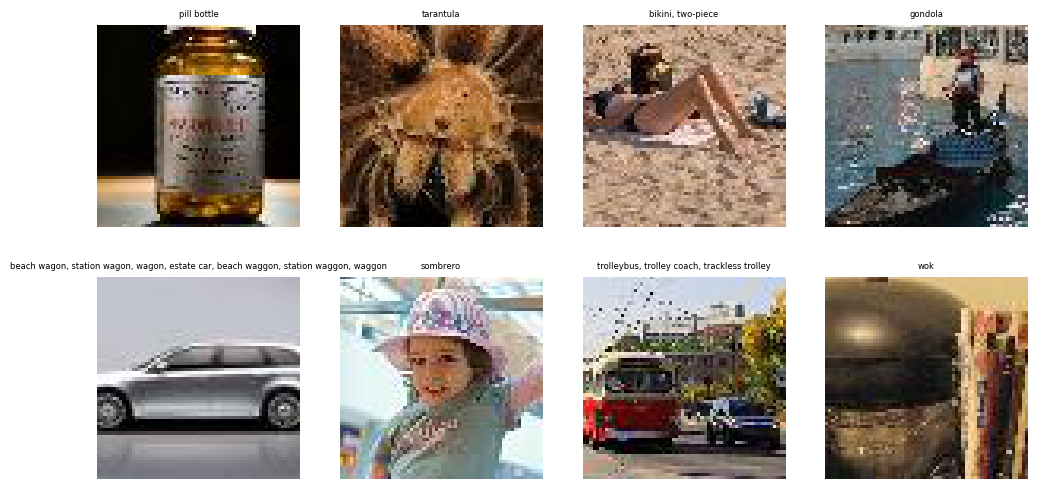

In [26]:
dls.show_batch()

In [61]:
xb,yb = dls.one_batch()
yb = [o[1] for o in dls.decode_batch((xb,yb))]

## Diffusion definition

In [85]:
def noisify(x):
    t = torch.randn(x.shape[0], device=x.device)
    alpha = torch.cos(t * 2 * math.pi)
    sigma = torch.sin(t * 2 * math.pi)
    return x * alpha[:,None,None,None] + sigma[:,None,None,None] * torch.randn_like(x, device=x.device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


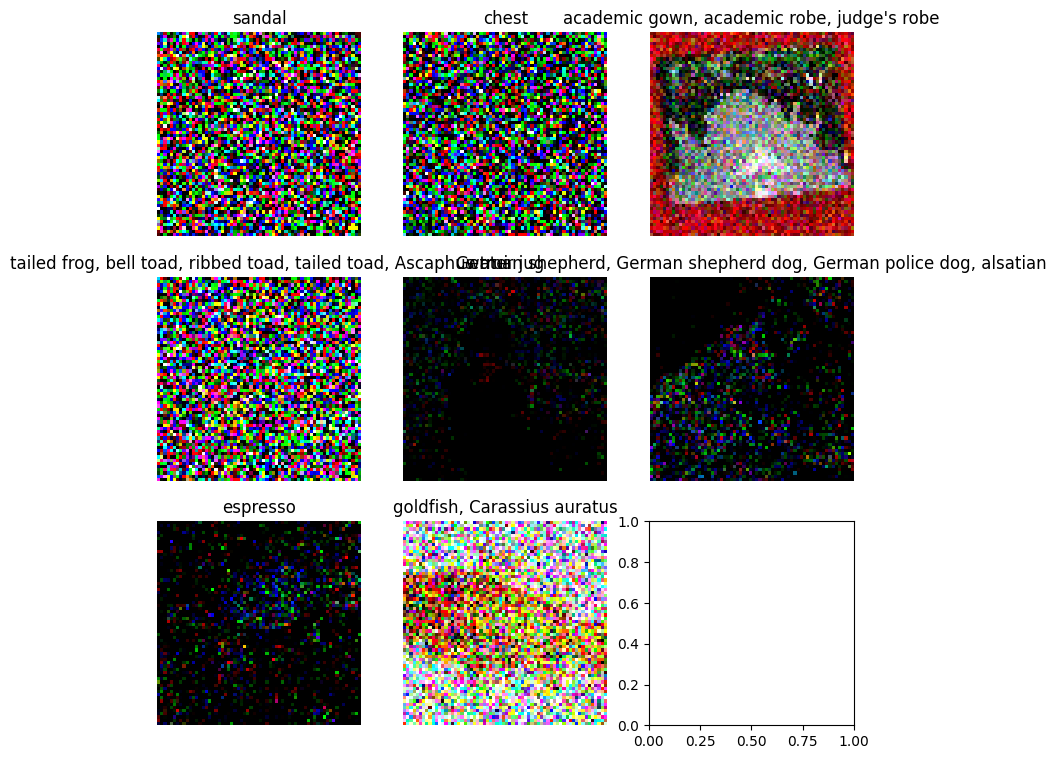

In [89]:
show_images(noisify(xb),titles = yb, ncols=3,nrows=3)

In [90]:
from Unet import EmbUNetModel

In [91]:
model = EmbUNetModel(in_channels=3, out_channels=3, nfs=(32,64,128,256), num_layers=2)

In [ ]:
# TODO
def x0_loss(x_pred, t, x0):
    return F.mse_loss(x_pred, x0)

def eps_loss(eps_pred, t, eps):
    return F.mse_loss(eps_pred, eps)

def v_loss(v_pred, t, v):
    return F.mse_loss(v_pred, v)

In [ ]:
# Nested U-net